In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('insurance.csv')

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:
data.shape #not a method, it is an attributes

(1338, 7)

In [13]:
print("number of rows", data.shape[0])
print("number of columns",data.shape[1])

number of rows 1338
number of columns 7


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
data.describe(include ='all')
# include numerical and object column

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_columns = data.select_dtypes(include =['object']).columns
for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [20]:
X = data.drop(['charges'],axis=1)

In [21]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [22]:
y = data['charges']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,1
1285,47,0,24.320,0,0,0
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,1
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0
860,37,0,47.600,2,1,3


In [26]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [29]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred3})

In [30]:
df1 
#why i rf and gr the same?

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.497618,10969.277492,10969.277492
887,5272.17580,7116.295018,9493.240235,5669.252305,5669.252305
890,29330.98315,36909.013521,9648.305149,28207.323941,28207.323941
1293,9301.89355,9507.874691,9555.219911,9440.148980,9440.148980
259,33750.29180,27013.350008,9421.456253,34658.655691,34658.655691
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.427941,46795.899004,46795.899004
575,12222.89830,11814.555568,9625.054566,12265.913630,12265.913630
535,6067.12675,7638.107736,9504.794628,6386.751947,6386.751947
543,63770.42801,40959.081722,9604.857687,46828.508749,46828.508749


In [31]:
import matplotlib.pyplot as plt

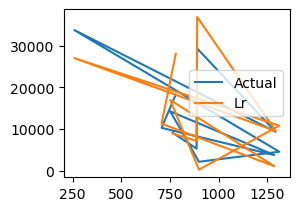

In [32]:
plt.subplot(221)
# rows, columns,subplot
#iloc to compare the first 11 columns
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

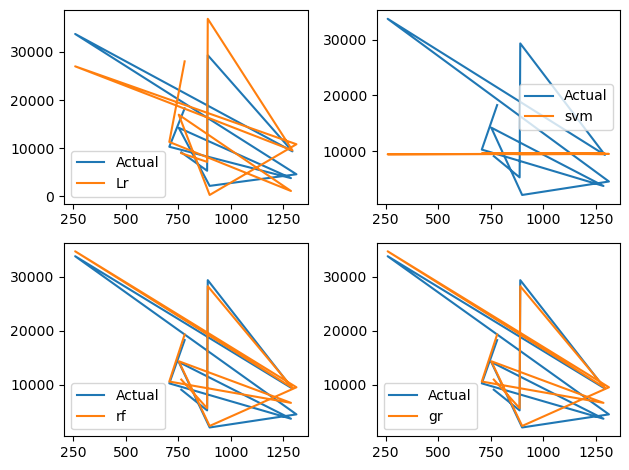

In [33]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()
#plt.legend gives the labels the two lines

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')

plt.tight_layout()

plt.legend()

In [34]:
from sklearn import metrics

In [35]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [36]:
print(score1,score2,score3,score4)
#88 percent of the variance of the charge being studied is explained by the model, better the regression model

0.7833463107364539 -0.07230823043884493 0.8623536792306874 0.8779726251291786


In [37]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)
#y_pred 4 has the min error from the actual value from the test value; evaluate performance of the model

In [38]:
print(s1,s2,s3,s4)

4186.508898366435 8592.792242831822 2510.758970553607 2447.951558054584


In [39]:
data ={'age':40,
       'sex':1,
       'bmi':40.30,
       'children':4,
       'smoker':1,
       'region':2}

In [40]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [41]:
new_pred = gr.predict(df)
print("Medical Insurance Cost for New Customer is: ",new_pred[0])

Medical Insurance Cost for New Customer is:  43013.23345490827


In [42]:
# train gr to the entire dataset

gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [43]:
import joblib

In [44]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [45]:
#perform prediction using joblib
model = joblib.load('model_joblib_gr')

In [46]:
model.predict(df)

array([42148.361888])

In [47]:
#Create GUI
from tkinter import*

In [53]:
age = int(input("Enter your age:"))
gender = input("Male or Female:")
bmi = float(input("BMI Value:"))
children = int(input("Number of children:"))
smoker = input("Smoker yes/no:")
region =int(input("Region 1-4:"))

Enter your age:23
Male or Female:female
BMI Value:22
Number of children:2
Smoker yes/no:yes
Region 1-4:2


In [57]:
#make a dictionary 
import pandas as pd
x = {'age':[age],'sex':[gender],'bmi':[bmi],'children':[children],'smoker':[smoker],'region':[region]}
df=pd.DataFrame(x)
df.head()

,age,sex,bmi,children,smoker,region
0,23,female,22.0,2,yes,2


In [58]:
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['sex']=df['sex'].map({'female':0,'male':1})

In [59]:
model.predict(df)

array([18312.54113343])